<a href="https://colab.research.google.com/github/merlynjocol/DigitalActions_NLP_NLU/blob/main/NLP_Heidi_TopicModelling_GENSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

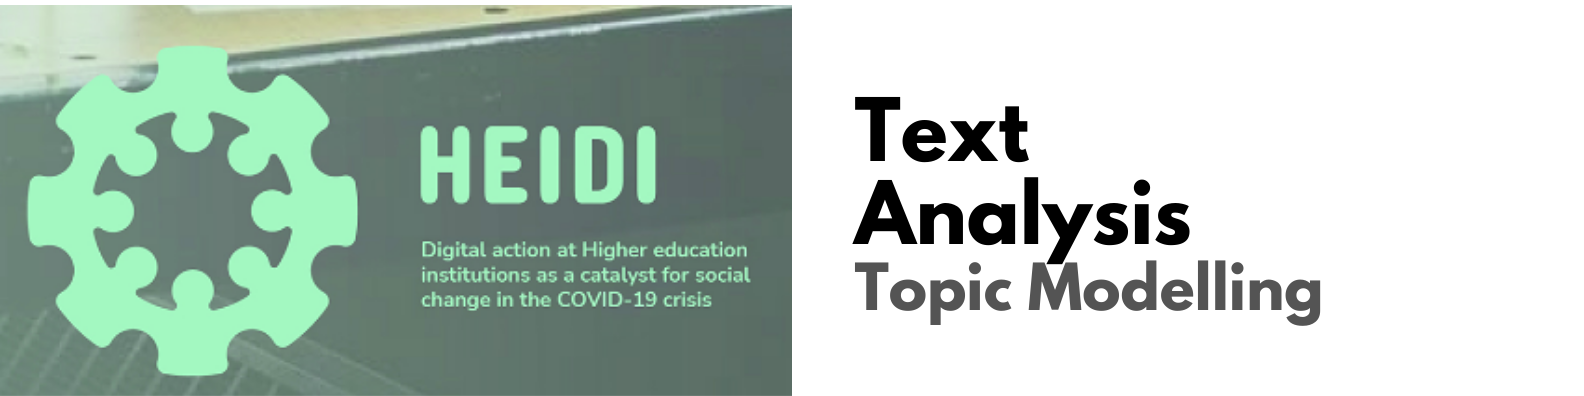

# 🔷 Identification of Topics from Report and Scientific Papers- **GEMSIM LDA**
Topic modeling is a probabilistic model that identifies topics covered in text. 
In this Notebook is the implementation 
The technique I will be introducing is categorized as an unsupervised machine learning algorithm. The algorithm's name is Latent Dirichlet Allocation (LDA) and is part of Python's Gensim package.




# The Process

The image show the overall process.

- Step 1. Collecting the documents
- Step 2. Data cleaning 
- Step 3. Breakdown all the documents into tokens
- Step 4. Creation of Dictionary
- Step 5. Finfing the optimal number of topics
- Step 6. Finding the distribution of topics in each document

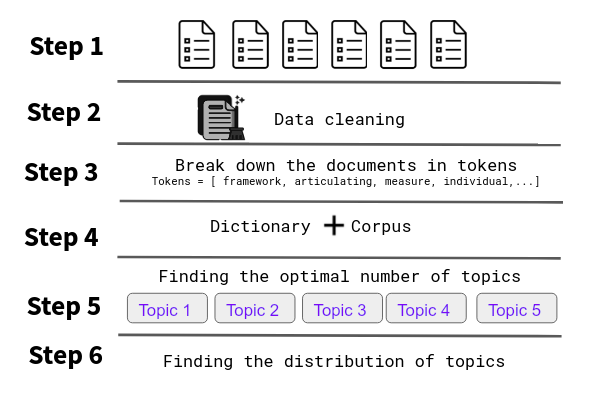



```
# This is formatted as code
```

## 📙 Import Libraries 

In [ ]:
# import files from Google Drive
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# Install
!pip install -qq -U gensim
!pip install seaborn -qq
!pip install spacy -qq
!python -m spacy download en_core_web_md 

     |████████████████████████████████| 96.4 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import pandas as pd
#pd.__version__

In [ ]:
# Import
#import numpy as np

# NLP
import spacy
import en_core_web_md # SpaCy train the model. md is medium size

#visulization libraries
from spacy import displacy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Topic modelling
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

import pyLDAvis

# Hide warnings 
#import warnings 
#warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# download data from github docs_csguide.csv
url ="https://github.com/merlynjocol/DigitalActions_NLP_NLU/blob/main/Datasets/docs_csguide.csv?raw=true"

In [ ]:
docs_csguide = pd.read_csv(url)


In [ ]:
docs_csguide.head(2)

,Unnamed: 0,linkDrive,text,URLs,count_URLs,clean_meaning,pre_cleantext,cleanText
0,0,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,A Framework for Articulating and Measuring Ind...,"['https://doi.org/10.5334/cstp.126', 'https://...",19,A Framework for Articulating and Measuring Ind...,a framework for articulating and measuring ind...,framework articulating measuring individual le...
1,1,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,What do volunteers want from citizen science t...,"['https://doi.org/10.22323/2.18010202DOI', 'ht...",44,What do volunteers want from citizen science t...,what do volunteers want from citizen science t...,volunteers want citizen science technologies s...


## Installing pyLDAvis

In [ ]:
!pip install pyLDAvis -qq

In [ ]:

import pyLDAvis
import pyLDAvis.gensim_models # don't skip this
pyLDAvis.enable_notebook()# Visualise inside a notebook


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


## Importing Files from GitHub

In [ ]:
# import files from Google Drive
from google.colab import files
uploaded = files.upload()

Saving docs_csguide.csv to docs_csguide (1).csv


###  another way to add files
https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Topic%20models%20with%20Gensim.ipynb#scrollTo=jr85DxD3THSX

# Step 1. Step 1. Collecting the Documents and Extracting Tex Data
The process of collection of documents is describe here: ❗

Check the Notebook of [Extracting Text Data](https://colab.research.google.com/drive/1HAPWy3hSi31tDrfOj7Y9zQaG_4QFhwkz#scrollTo=I3b8I2UFL7aE&uniqifier=10)


# Step 2. Data cleaning
Check the process in this Notebook: [Data Cleaning](https://https://colab.research.google.com/drive/1GBUu5CvCr_KL1UuV6WUDFobFilysv7M9#scrollTo=yHkX3EU7Ih7E&uniqifier=1)

# Step 3. Break down the documents in Tokens

The model, which I will call 'nlp', can be thought of as a pipeline. When you call 'nlp' on a text or word, the text runs through a processing pipeline, which is depicted below. It means that if the text isn't tokenized, it will then be tokenized, and afterwards, different components (tagger, parser, ner etc.) will be activated. To tokenize text means turning a string or document into smaller chunks (tokens).

The model is specially trained on English text (notice the 'en' in the model name), making it capable of detecting different English words. Other language models are also supported.

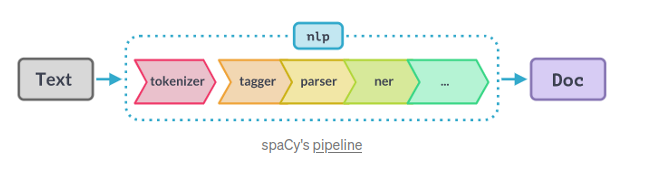

The most interesting component in the pipeline is the tagger which assigns Part-Of-Speech (POS) tags based on SpaCy's English language model to gain a variety of annotations. A POS tag (or part-of-speech tag) is a special label assigned to each token in a text corpus to indicate the type of token (is it an adjective? Punctuation? A verb? etc.) and often also other grammatical categories such as tense, number (plural/singular), symbols etc. POS tags are used in corpus searches and in-text analysis tools and algorithms.

Some of the POS tags are listed below:

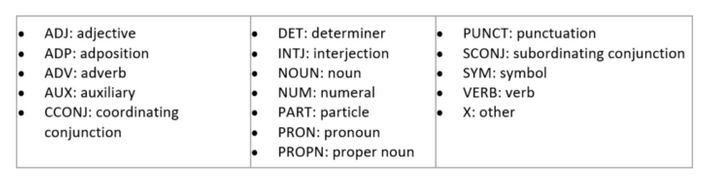

let's use the POS tags to preprocess the data by removing unwanted tags.

I will focus on the 'cleanText' column, where I will tokenize, lemmatize and remove stopwords.

## Load the model

In [ ]:
# the spaCy model:
nlp = spacy.load("en_core_web_md")# Tags I want to remove from the text


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


## Total of List of stopwords + customwords



Notice that after checking the most common words, there are words that are not useful for the analysis. e.g. "et", "etc". We need to add them to the list of stopwords give from SpaCy

In [ ]:
# add some common words to stop wordds that may not add much context
# I used the list in english
from spacy.lang.en.stop_words import STOP_WORDS
customStopWords = [
    'whether', 'x', 'may','either','also', 'etc', 'et', 'al' ,'org', 'co', "mailto", "pp", "p", "doi", "nov", "feb", "ph", "e", "citizen", "science", "project", "g", "www"]

for w in customStopWords:
    if w not in STOP_WORDS:
        STOP_WORDS.add(w)

In [ ]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

Number of stop words: 345


## Option 1. Removing Tags from the text

### Tags to remove from the text

In [ ]:
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']


In [ ]:
docs_csguide.columns

Index(['Unnamed: 0', 'linkDrive', 'text', 'URLs', 'count_URLs',
       'clean_meaning', 'pre_cleantext', 'cleanText'],
      dtype='object')

### Creation of tokens, lemmatization and removing words POS

In [ ]:
# create the tokens, lemmatization and tag the words POS 
%%time
tokens = []
for summary in nlp.pipe(docs_csguide['cleanText']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)



/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

CPU times: user 22 s, sys: 3.95 s, total: 25.9 s
Wall time: 26.1 s


In [ ]:
# create a column with the tokens
%%time
docs_csguide['tokens'] = tokens

CPU times: user 1.1 ms, sys: 1.04 ms, total: 2.14 ms
Wall time: 2.14 ms


In [ ]:
docs_csguide.head(2)

,Unnamed: 0,linkDrive,text,URLs,count_URLs,clean_meaning,pre_cleantext,cleanText,tokens
0,0,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,A Framework for Articulating and Measuring Ind...,"['https://doi.org/10.5334/cstp.126', 'https://...",19,A Framework for Articulating and Measuring Ind...,a framework for articulating and measuring ind...,framework articulating measuring individual le...,"[framework, articulating, measure, individual,..."
1,1,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,What do volunteers want from citizen science t...,"['https://doi.org/10.22323/2.18010202DOI', 'ht...",44,What do volunteers want from citizen science t...,what do volunteers want from citizen science t...,volunteers want citizen science technologies s...,"[volunteer, want, citizen, science, technology..."


NOTE: notice that the tokens are not totally lemmatized (eg.measuring)

### Option 2. Pipeline. Lemmatize and remove stopwords

In [ ]:
%%time
def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in spacy_stopwords] 
    return lemma_list



CPU times: user 0 ns, sys: 6 µs, total: 6 µs
Wall time: 11.7 µs


In [ ]:
def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

In [ ]:
%%time
docs_csguide['tokensLemm'] = preprocess_pipe(docs_csguide['cleanText'])


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

CPU times: user 21.1 s, sys: 3.38 s, total: 24.5 s
Wall time: 24.4 s


In [ ]:
docs_csguide.head(2)

,Unnamed: 0,linkDrive,text,URLs,count_URLs,clean_meaning,pre_cleantext,cleanText,tokens,tokensLemm
0,0,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,A Framework for Articulating and Measuring Ind...,"['https://doi.org/10.5334/cstp.126', 'https://...",19,A Framework for Articulating and Measuring Ind...,a framework for articulating and measuring ind...,framework articulating measuring individual le...,"[framework, articulating, measure, individual,...","[framework, articulating, measure, individual,..."
1,1,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,What do volunteers want from citizen science t...,"['https://doi.org/10.22323/2.18010202DOI', 'ht...",44,What do volunteers want from citizen science t...,what do volunteers want from citizen science t...,volunteers want citizen science technologies s...,"[volunteer, want, citizen, science, technology...","[volunteer, want, technology, systematic, lite..."


### Option 3. Token without stopwords and removal

In [ ]:
def lemmatize(doc):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    doc = nlp(doc)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in spacy_stopwords 
                  and tok.pos_ not in removal ]
    return lemma_list


In [ ]:
# Hide warnings 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
%%time
docs_csguide['lemma'] = docs_csguide['cleanText'].apply(lemmatize)


CPU times: user 25.1 s, sys: 2.46 s, total: 27.5 s
Wall time: 27.5 s


In [ ]:
docs_csguide.head(2)

,Unnamed: 0,linkDrive,text,URLs,count_URLs,clean_meaning,pre_cleantext,cleanText,tokens,tokensLemm,lemma
0,0,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,A Framework for Articulating and Measuring Ind...,"['https://doi.org/10.5334/cstp.126', 'https://...",19,A Framework for Articulating and Measuring Ind...,a framework for articulating and measuring ind...,framework articulating measuring individual le...,"[framework, articulating, measure, individual,...","[framework, articulating, measure, individual,...","[framework, articulating, measure, individual,..."
1,1,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,What do volunteers want from citizen science t...,"['https://doi.org/10.22323/2.18010202DOI', 'ht...",44,What do volunteers want from citizen science t...,what do volunteers want from citizen science t...,volunteers want citizen science technologies s...,"[volunteer, want, citizen, science, technology...","[volunteer, want, technology, systematic, lite...","[volunteer, want, technology, systematic, lite..."


# Step 4. Create a dictionary

Step 5. Finfing the optimal number of topics
Step 6. Finding the distribution of topics in each document

From the tokens, I build a dictionary that gives to each token a unique ID number.This ID is used to create the corpues and the Bad of Words representing the frequency of tokens 

The two main inputs to the LDA topic model are the dictionary and the corpus:

- Dictionary: The idea of the dictionary is to give each token a unique ID
- Corpus: Having assigned a unique ID to each token, the corpus simply contains each ID and its frequency

### Dictionary for tokens withoug POS

In [ ]:
# I will apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(docs_csguide['tokens'])

In [ ]:
print(dictionary.token2id)

{'ability': 0, 'able': 1, 'academies': 2, 'access': 3, 'accessibility': 4, 'accompany': 5, 'accord': 6, 'account': 7, 'accuracy': 8, 'accurate': 9, 'achievable': 10, 'achieve': 11, 'achievement': 12, 'acknowledgement': 13, 'acquisition': 14, 'act': 15, 'action': 16, 'active': 17, 'activitie': 18, 'activity': 19, 'actual': 20, 'adaptation': 21, 'add': 22, 'addition': 23, 'additional': 24, 'address': 25, 'administer': 26, 'adopt': 27, 'adoption': 28, 'adult': 29, 'advancement': 30, 'advisory': 31, 'advocacy': 32, 'advocate': 33, 'affair': 34, 'affect': 35, 'affective': 36, 'africa': 37, 'afterschool': 38, 'agency': 39, 'aggregate': 40, 'agreement': 41, 'agyeman': 42, 'ajzen': 43, 'al': 44, 'alan': 45, 'albeit': 46, 'align': 47, 'alignment': 48, 'alliance': 49, 'allow': 50, 'allum': 51, 'american': 52, 'amount': 53, 'ample': 54, 'analysis': 55, 'analyze': 56, 'anecdotal': 57, 'animal': 58, 'annotation': 59, 'answer': 60, 'appear': 61, 'appendix': 62, 'appliance': 63, 'applicability': 64, 

### Dictionary fot tokens without stopwords

In [ ]:
docs_csguide.columns

Index(['Unnamed: 0', 'linkDrive', 'text', 'URLs', 'count_URLs',
       'clean_meaning', 'pre_cleantext', 'cleanText', 'tokens', 'tokensLemm',
       'lemma'],
      dtype='object')

In [ ]:
dictionary2 = Dictionary(docs_csguide['tokensLemm'])

In [ ]:
print(dictionary2.token2id)

{'ability': 0, 'able': 1, 'academies': 2, 'access': 3, 'accessibility': 4, 'accompany': 5, 'accord': 6, 'account': 7, 'accuracy': 8, 'accurate': 9, 'accurately': 10, 'achievable': 11, 'achieve': 12, 'achievement': 13, 'acknowledgement': 14, 'acquisition': 15, 'act': 16, 'action': 17, 'active': 18, 'actively': 19, 'activitie': 20, 'activity': 21, 'actual': 22, 'actually': 23, 'adaptation': 24, 'add': 25, 'addition': 26, 'additional': 27, 'additionally': 28, 'address': 29, 'administer': 30, 'adopt': 31, 'adoption': 32, 'adult': 33, 'advancement': 34, 'advisory': 35, 'advocacy': 36, 'advocate': 37, 'affair': 38, 'affect': 39, 'affective': 40, 'africa': 41, 'afterschool': 42, 'agency': 43, 'aggregate': 44, 'agreement': 45, 'agyeman': 46, 'ajzen': 47, 'alan': 48, 'albeit': 49, 'align': 50, 'alignment': 51, 'alliance': 52, 'allow': 53, 'allum': 54, 'american': 55, 'amount': 56, 'ample': 57, 'analysis': 58, 'analyze': 59, 'anecdotal': 60, 'animal': 61, 'annotation': 62, 'answer': 63, 'appear'

### Dictionary of tokens without POS and StopWords

In [ ]:
dictionary3 = Dictionary(docs_csguide['lemma'])

In [ ]:
print(dictionary3.token2id)

{'ability': 0, 'able': 1, 'academies': 2, 'access': 3, 'accessibility': 4, 'accompany': 5, 'accord': 6, 'account': 7, 'accuracy': 8, 'accurate': 9, 'achievable': 10, 'achieve': 11, 'achievement': 12, 'acknowledgement': 13, 'acquisition': 14, 'act': 15, 'action': 16, 'active': 17, 'activitie': 18, 'activity': 19, 'actual': 20, 'adaptation': 21, 'add': 22, 'addition': 23, 'additional': 24, 'address': 25, 'administer': 26, 'adopt': 27, 'adoption': 28, 'adult': 29, 'advancement': 30, 'advisory': 31, 'advocacy': 32, 'advocate': 33, 'affair': 34, 'affect': 35, 'affective': 36, 'africa': 37, 'afterschool': 38, 'agency': 39, 'aggregate': 40, 'agreement': 41, 'agyeman': 42, 'ajzen': 43, 'alan': 44, 'albeit': 45, 'align': 46, 'alignment': 47, 'alliance': 48, 'allow': 49, 'allum': 50, 'american': 51, 'amount': 52, 'ample': 53, 'analysis': 54, 'analyze': 55, 'anecdotal': 56, 'animal': 57, 'annotation': 58, 'answer': 59, 'appear': 60, 'appendix': 61, 'appliance': 62, 'applicability': 63, 'applicati

## Filter out low-frequency and high-frequency tokens. 
Also limit the vocabulary to a max of 1000 words

In [ ]:
# dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

- No_below: Tokens that appear in less than 5 documents are filtered out.
- No_above: Tokens that appear in more than 50% of the total corpus are also removed as default.
- Keep_n: We limit ourselves to the top 1000 most frequent tokens (default is 100.000). Set to ‘None’ if you want to keep all.

# Step 5. Finding the optimal number of topics

# Option1. without stopwrods

## Corpus


In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in docs_csguide['tokens']]

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

## Calculating the coherence score using C_umass


```
# This is formatted as code
```





In [ ]:
topics = []
score = []

for i in range(1,20,1):  
  lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)  
  
  cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')  
  topics.append(i)
  score.append(cm.get_coherence())
  
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()



We can use the coherence score in topic modeling to measure how interpretable the topics are to humans. In this case, topics are represented as the top N words with the highest probability of belonging to that particular topic. Briefly, the coherence score measures how similar these words are to each other.

Instead of using the CV score, we recommend using the UMass coherence score. It calculates how often two words, w_{i} and w_{j} appear together in the corpus and it’s defined as

(2)   \begin{equation*} C_{UMass}(w_{i}, w_{j}) = \log \frac{D(w_{i}, w_{j}) + 1}{D(w_{i})}, \end{equation*}

where D(w_{i}, w_{j}) indicates how many times words w_{i} and w_{j} appear together in documents, and D(w_{i}) is how many time word w_{i} appeared alone. The greater the number, the better is coherence score. Also, this measure isn’t symmetric, which means that  C_{UMass}(w_{i}, w_{j})  is not equal to C_{UMass}(w_{j}, w_{i}). We calculate the global coherence of the topic as the average pairwise coherence scores on the top N words which describe the topic.

https://www.baeldung.com/cs/topic-modeling-coherence-score

## Calculating the coherence score using C_v:

In [ ]:
topics = []
score = []

for i in range(1,20,1): 
  lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)   
  
  cm = CoherenceModel(model=lda_model, texts = docs_csguide['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')  
  
  topics.append(i)
  score.append(cm.get_coherence())
  
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

When looking at the coherence using the C_umass or C_v algorithm, the best is usually the max. Looking at the graphs I choose to go with  10 topics, although no certain answer can be given

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=10, workers = 4, passes=100)

## Print and visualize topics 

Let's print out the 10 topics and the related words:

In [ ]:
lda_model.print_topics(-1)

# Option3. Corpus without stopwords and POS

### Corpus

In [ ]:
corpus3 = [dictionary3.doc2bow(doc) for doc in docs_csguide['lemma']]

In [ ]:
lda_model3 = LdaMulticore(corpus=corpus3, id2word=dictionary3, iterations=50, num_topics=10, workers = 4, passes=10)

## Calculating the coherence score using C_umass

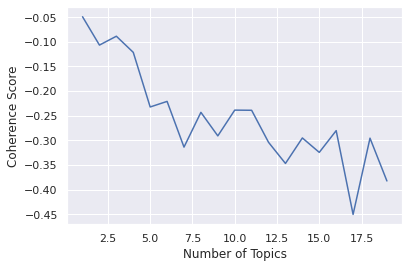

In [ ]:
topics = []
score = []

for i in range(1,20,1):  
  lda_model = LdaMulticore(corpus=corpus3, id2word=dictionary3, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)  
  
  cm = CoherenceModel(model=lda_model, corpus=corpus3, dictionary=dictionary3, coherence='u_mass')  
  topics.append(i)
  score.append(cm.get_coherence())
  
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()



## Calculating the coherence score using C_v:

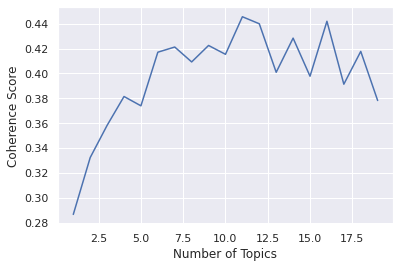

In [ ]:
topics = []
score = []

for i in range(1,20,1): 
  lda_model = LdaMulticore(corpus=corpus3, id2word=dictionary3, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)   
  
  cm = CoherenceModel(model=lda_model, texts = docs_csguide['lemma'], corpus=corpus3, dictionary=dictionary3, coherence='c_v')  
  
  topics.append(i)
  score.append(cm.get_coherence())
  
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

When looking at the coherence using the C_umass or C_v algorithm, the best is usually the max. Looking at the graphs I choose to go with 6 y 10 topics, although no certain answer can be given

### Visualize 6 Topics

In [ ]:
lda_model6 = LdaMulticore(corpus=corpus3, id2word=dictionary3, iterations=100, num_topics=6, workers = 4, passes=100)

In [ ]:
lda_model6 = LdaMulticore(corpus=corpus3, id2word=dictionary3, iterations=100, num_topics=6, workers = 4, passes=100)

In [ ]:
lda_model6.print_topics(-1)

[(0,
  '0.020*"information" + 0.012*"sample" + 0.011*"state" + 0.010*"agency" + 0.009*"law" + 0.009*"use" + 0.009*"quality" + 0.008*"pollutant" + 0.007*"collect" + 0.006*"chapter"'),
 (1,
  '0.015*"datum" + 0.010*"research" + 0.010*"participant" + 0.009*"project" + 0.007*"data" + 0.007*"people" + 0.006*"motivation" + 0.006*"need" + 0.006*"volunteer" + 0.006*"scientist"'),
 (2,
  '0.021*"participant" + 0.017*"project" + 0.012*"scientist" + 0.012*"research" + 0.011*"online" + 0.010*"community" + 0.009*"respondent" + 0.008*"motivation" + 0.008*"participation" + 0.008*"contribution"'),
 (3,
  '0.032*"community" + 0.015*"knowledge" + 0.014*"learn" + 0.013*"online" + 0.010*"theory" + 0.009*"participant" + 0.009*"share" + 0.008*"goal" + 0.007*"provide" + 0.007*"design"'),
 (4,
  '0.025*"quality" + 0.022*"datum" + 0.013*"sample" + 0.012*"data" + 0.012*"assurance" + 0.009*"plan" + 0.008*"agency" + 0.008*"template" + 0.008*"collect" + 0.007*"project"'),
 (5,
  '0.019*"outcome" + 0.013*"learn" + 

### Visualize 10 Topics

In [ ]:
lda_model10 = LdaMulticore(corpus=corpus3, id2word=dictionary3, iterations=100, num_topics=10, workers = 4, passes=100)

In [ ]:
lda_model10.print_topics(-1)

[(0,
  '0.016*"information" + 0.016*"quality" + 0.014*"sample" + 0.010*"agency" + 0.010*"datum" + 0.009*"use" + 0.009*"state" + 0.008*"collect" + 0.007*"law" + 0.007*"data"'),
 (1,
  '0.014*"research" + 0.012*"datum" + 0.012*"member" + 0.011*"platform" + 0.009*"need" + 0.008*"public" + 0.008*"open" + 0.007*"project" + 0.007*"openness" + 0.007*"individual"'),
 (2,
  '0.016*"datum" + 0.013*"research" + 0.009*"communication" + 0.009*"participant" + 0.008*"project" + 0.006*"data" + 0.006*"funding" + 0.006*"important" + 0.005*"de" + 0.005*"evaluation"'),
 (3,
  '0.024*"motivation" + 0.017*"stakeholder" + 0.013*"scientist" + 0.013*"participant" + 0.012*"people" + 0.011*"project" + 0.010*"volunteer" + 0.010*"respondent" + 0.010*"policy" + 0.009*"participation"'),
 (4,
  '0.000*"research" + 0.000*"project" + 0.000*"datum" + 0.000*"scientist" + 0.000*"motivation" + 0.000*"participant" + 0.000*"group" + 0.000*"time" + 0.000*"public" + 0.000*"result"'),
 (5,
  '0.015*"scientist" + 0.012*"tekstvel

# Step 6. Visualize the Topics and the words in the topics 

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model6, corpus3, dictionary3)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)












---



The above chart represents our five topics as circles. They have been drawn using a dimensionality reduction technique called PCA. The goal is to have a distance in order to avoid overlapping and make each circle unique. When I hover over a circle different words are displayed on the right, showing word frequency (blue) and estimated term frequency within the selected topic (red). Topics closer to each other are more related.

In [ ]:
#display in html
pyLDAvis.save_html(lda_display, 'lda.html')



---



---



# Add Topics to the Dataframe
See example 
https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf

## Other Resources

Notes to expand your knowledge:

- You might notice the 'is_alpha' and 'is_stop', which are attributes connected to specific tokens; you can look at the full list here: 

https://spacy.io/api/token


- Another point is 'nlp.pipe', which is specifically used to process text as a sequence of strings. This is much more efficient than processing text one by one. If you're only processing a single text, simply remove the '.pipe' extension. 

Source: https://spacy.io/usage/processing-pipelines

References: 
https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf